In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [2]:
wine_data = pd.read_csv('wine_quality.csv')

In [3]:
wine_data.shape

(1599, 12)

In [4]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#checking for missing values
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

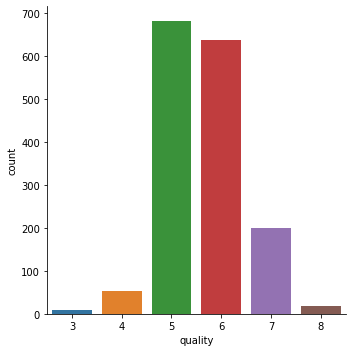

In [7]:
#data analysis & visualization

#number of values for each quality
sns.catplot(x='quality', data = wine_data, kind = 'count')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

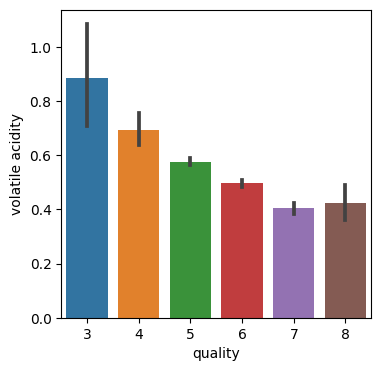

In [8]:
#comparing the volitile acidity and quality
plot = plt.figure(figsize=(4,4))
sns.barplot(x='quality', y='volatile acidity',data=wine_data)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

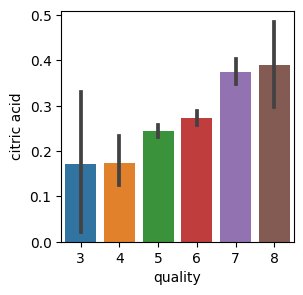

In [9]:
#comparing the citric acid and quality
plot = plt.figure(figsize=(3,3))
sns.barplot(x='quality',y='citric acid', data = wine_data)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

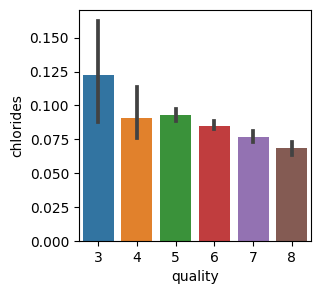

In [10]:
#comparing the chlorides and quality
plot = plt.figure(figsize=(3,3))
sns.barplot(x='quality',y='chlorides',data = wine_data)

<AxesSubplot:xlabel='quality', ylabel='density'>

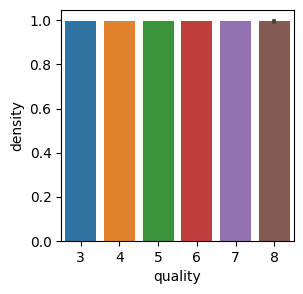

In [11]:
#comparing the volitile density and quality
plot = plt.figure(figsize=(3,3))
sns.barplot(x='quality',y='density',data=wine_data)

# Correlation

In [12]:
coorelation = wine_data.corr()

<AxesSubplot:>

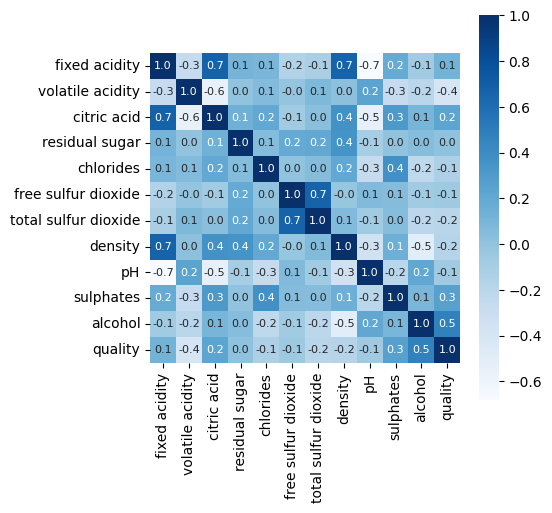

In [13]:
#constructing a heatmap to understand the correlation between the column
plt.figure(figsize=(5,5))
sns.heatmap(coorelation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

# Data Preprocessing

In [14]:
#seperating data
data = wine_data.drop('quality',axis=1)


In [15]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


# Label Binarization

In [17]:
label = wine_data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [18]:
print(label)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [20]:
#Train and test data
X_train, X_test, Y_train, Y_test = train_test_split(data,label,test_size=.2, random_state=2)

In [22]:
print(data.shape,X_train.shape,X_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [23]:
#Model Training 
#Random Forest Classifier(Multiple decision tree result model)

model = RandomForestClassifier()

In [24]:
model.fit(X_train, Y_train)

RandomForestClassifier()

# Model Evaluation

In [26]:
#Accuracy score
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [28]:
print('Accuracy: ',test_data_accuracy) 

Accuracy:  0.925


# Predictive System

In [32]:
input_data = (7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4)

#changing the input data to a numpy array
imput_data_as_numpy_array = np.asarray(input_data)

#reshape the data as we are predicting the lable for only 1 istance
input_data_reshape = imput_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)

C:\Users\hwale\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [33]:
print(prediction)

[0]


In [34]:
if prediction == 1:
    print('Wine Quality is good')
else:
    print('Wine quality is not good')

Wine quality is not good
